/var/folders/ws/jw7vmdhx3yq2zps6fh4r4wmc0000gn/T/ipykernel_25356/2579603227.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


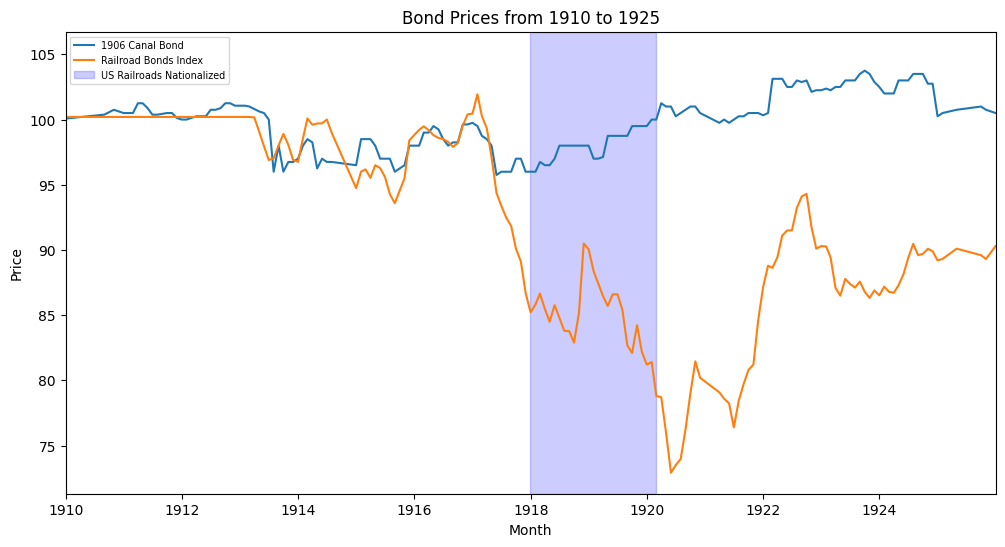

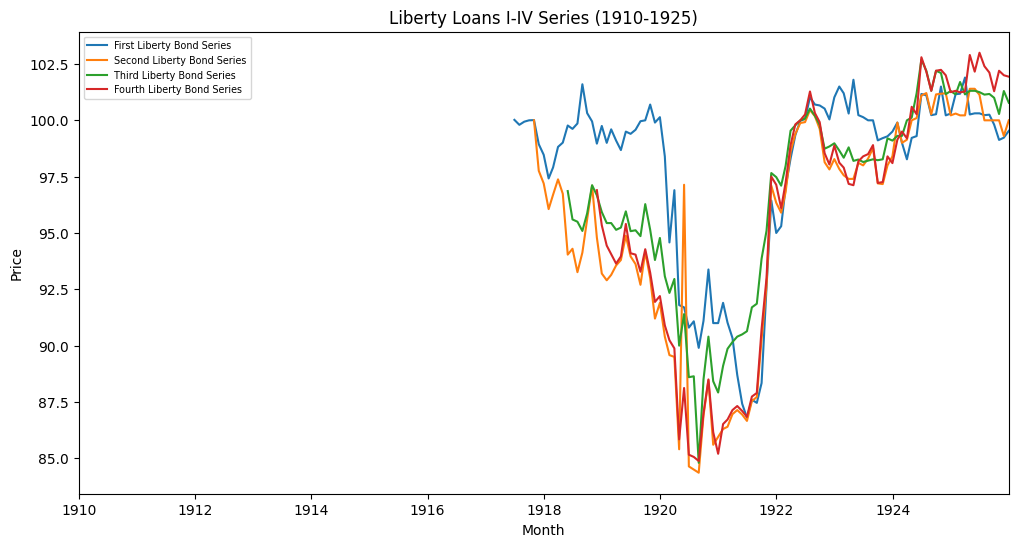

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

def return_data(l1_id:int):
    bondprices = pd.read_csv('/Users/aleskamedrano/Desktop/GitHub/HistoricalEconomics/data/other/BondPrice.csv')
    l1_ids = bondprices['L1 ID'].values 
    
    idx = np.where(l1_ids==l1_id)[0] 
    idx = idx[0] 
        
    row = bondprices.iloc[[idx]] 

    dates = list(row)
    prices = row.values[0]  

    dates = dates[2:]
    prices = prices[2:].astype(float)

    dates = pd.to_datetime(dates)

    nan_mask = np.isnan(prices)

    return dates[~nan_mask], prices[~nan_mask]

# Retrieve data
canal_bond_date, canal_bond_price = return_data(20132)

not_nan_mask = ~np.isnan(canal_bond_price)
canal_bond_date = canal_bond_date[not_nan_mask]
canal_bond_price = canal_bond_price[not_nan_mask]

railroad_df = pd.read_csv('/Users/aleskamedrano/Desktop/GitHub/HistoricalEconomics/data/other/railroad-bond-price.csv')
railroad_bond_date = pd.to_datetime(railroad_df['Date'].values, format="%Y-%m-%d")
railroad_bond_price = railroad_df['HighGradeRailroadBondPrices'].values 

# Interpolation using timestamps
interpolated_railroad_price = np.interp(canal_bond_date.astype(int) / 10**9, railroad_bond_date.astype(int) / 10**9, railroad_bond_price)

# Define the plotting function
def plot_bonds(start_year, end_year):
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')

    plt.figure(figsize=(12, 6))
    
    plt.plot(canal_bond_date, canal_bond_price, label='1906 Canal Bond')
    plt.plot(canal_bond_date, interpolated_railroad_price, label='Railroad Bonds Index')
    
    plt.axvspan(pd.to_datetime('1917-12-28'), pd.to_datetime('1920-03-01'), color='blue', alpha=0.2, label='US Railroads Nationalized')

    # Highlight the range between the years
    plt.xlim(left=start_date, right=end_date)

    plt.ylabel("Price")
    plt.xlabel('Month')
    plt.title(f'Bond Prices from {start_year} to {end_year}')
    plt.legend(fontsize='x-small')
    plt.show()

# Plot for the range 1910-1925
plot_bonds(1910, 1925)

# Re-plot for Liberty Bonds series
def plot_liberty_bonds(start_year, end_year):
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')

    plt.figure(figsize=(12, 6))
    
    canal_1906_date, canal_1906_price = return_data(20132)
    first_liberty_bond_date, first_liberty_bond_price = return_data(20162)
    second_liberty_bond_date, second_liberty_bond_price = return_data(20166)
    third_liberty_bond_date, third_liberty_bond_price = return_data(20168)
    fourth_liberty_bond_date, fourth_liberty_bond_price = return_data(20169)

    plt.plot(first_liberty_bond_date, first_liberty_bond_price, label='First Liberty Bond Series')
    plt.plot(second_liberty_bond_date, second_liberty_bond_price, label='Second Liberty Bond Series')
    plt.plot(third_liberty_bond_date, third_liberty_bond_price, label='Third Liberty Bond Series')
    plt.plot(fourth_liberty_bond_date, fourth_liberty_bond_price, label='Fourth Liberty Bond Series')

    plt.xlim(left=start_date, right=end_date)
    
    plt.legend(fontsize='x-small')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.title(f'Liberty Loans I-IV Series ({start_year}-{end_year})')
    plt.show()

# Plot for Liberty Bonds series between 1910-1925
plot_liberty_bonds(1910, 1925)
